In [2]:
import pandas as pd

#Import for SVM
df = pd.read_csv('diabetes.csv')
columns_to_filter = ['Insulin', 'BloodPressure', 'Glucose', 'SkinThickness', 'BMI', 'Age']

num_rows = len(df)
df = df[(df[columns_to_filter] != 0).all(axis=1)]
num_rows_filtered = len(df)

print(df['Outcome'].value_counts())
print(f"Number of rows before filtering: {num_rows}")
print(f"Number of rows after filtering: {num_rows_filtered}")


Outcome
0    262
1    130
Name: count, dtype: int64
Number of rows before filtering: 768
Number of rows after filtering: 392


max accuracy: 0.810126582278481 {'C': 0.01, 'kernel': 'linear'}
Confusion Matrix:
 [[51  3]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        54
           1       0.81      0.52      0.63        25

    accuracy                           0.81        79
   macro avg       0.81      0.73      0.75        79
weighted avg       0.81      0.81      0.80        79



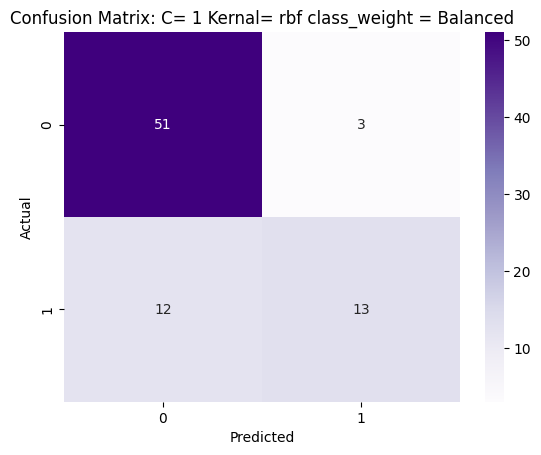

In [97]:
#SVM FOR DIABETES DATA SET

#Classification, Predict weather patient will have heart failure
import pandas as pd

#Import for SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Import for generating confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('diabetes.csv')
columns_to_filter = ['Insulin', 'BloodPressure', 'Glucose', 'SkinThickness', 'BMI', 'Age', 'DiabetesPedigreeFunction']

# Clearn Data, remove rows containing 0 (Indicating no data)
df = df[(df[columns_to_filter] != 0).all(axis=1)]


#SVM Classificaiton
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

#normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

max = 0
for c in [0.01, 0.1, 1, 10]:
  for k in ['linear', 'rbf', 'poly']:
    model = SVC(kernel = k, C = c)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > max:
      best_model = model
      params = {"C":c, "kernel":k}
      max = accuracy

print("max accuracy:",max, params)

#Results
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: C= 1 Kernal= rbf class_weight = Balanced")
plt.show()


max accuracy: 0.8354430379746836 {'N': 3}
Confusion Matrix:
 [[49  5]
 [ 9 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88        54
           1       0.76      0.64      0.70        25

    accuracy                           0.82        79
   macro avg       0.80      0.77      0.79        79
weighted avg       0.82      0.82      0.82        79



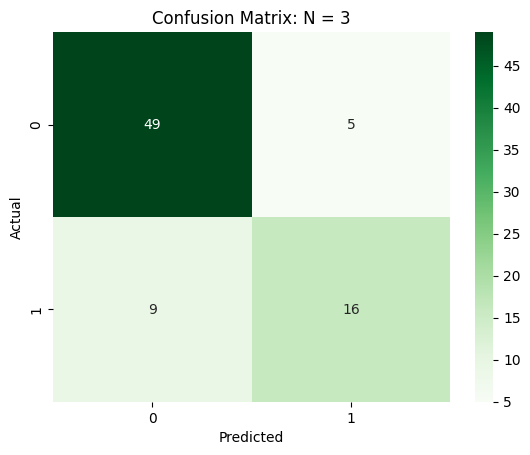

In [106]:
#KNN FOR DIABETES DATA SET

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Load dataset
df = pd.read_csv('diabetes.csv')
columns_to_filter = ['Insulin', 'BloodPressure', 'Glucose', 'SkinThickness', 'BMI', 'Age', 'DiabetesPedigreeFunction']

#clearn Data, remove rows containing 0 (Indicating no data)
df = df[(df[columns_to_filter] != 0).all(axis=1)]


#SVM Classificaiton
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

#normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

max = 0
for n in [1,2,3,4,5,6,7,8,9,10]:
  knn = KNeighborsClassifier(n_neighbors=n)  # Try different values for k

  # Train
  knn.fit(X_train_scaled, y_train)

  y_pred = knn.predict(X_test_scaled)
  score = knn.score(X_test_scaled, y_test)

  if score > max:
    best_model = knn
    params = {"N":n}
    max = score

print("max accuracy:",max, params)

#Results
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: N = 3")
plt.show()